In [1]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [5]:
data_dir = pathlib.Path("/content/drive/MyDrive/TCC_DOCS/images")
print(data_dir)

/content/drive/MyDrive/TCC_DOCS/images


In [6]:
np.random.seed(1000)

image_shape = 100
batch_size = 100
AlexNet = Sequential()

# Primeira camada convolucional
AlexNet.add(Conv2D(filters=96, input_shape=(image_shape, image_shape, 3), kernel_size=(11, 11), strides=(4, 4), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Segunda camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Terceira camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quarta camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quinta camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Camadas densas
AlexNet.add(Flatten())
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(1000))
AlexNet.add(Activation('relu'))

# Camada de saída
AlexNet.add(Dense(5))
AlexNet.add(Activation('softmax'))

# Resumo do modelo
AlexNet.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 25, 25, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           5,005 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 41,411,829 (157.97 MB)

 Trainable params: 41,411,829 (157.97 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape, image_shape),
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 47813 files belonging to 5 classes.
Found 47813 files belonging to 5 classes.
Using 9562 files for validation.
Found 47813 files belonging to 5 classes.
['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborreheic_keratosis', 'squamous_cellcarcinoma']


In [9]:
for image_batch, labels_batch in train_ds:
  train_img = image_batch
  train_labels = labels_batch
  break
for image_batch, labels_batch in val_ds:
  val_img = image_batch
  val_labels = labels_batch
  break
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  test_img = image_batch
  test_labels = labels_batch
  break

(100, 100, 100, 3)


In [10]:
AlexNet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [11]:
epochs = 50



history = AlexNet.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
    )

Epoch 1/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 3263s 7s/step - accuracy: 0.6780 - loss: 28.4496 - val_accuracy: 0.7201 - val_loss: 0.7417
Epoch 2/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 147s 308ms/step - accuracy: 0.7215 - loss: 0.7399 - val_accuracy: 0.7274 - val_loss: 0.7275
Epoch 3/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 147s 308ms/step - accuracy: 0.7325 - loss: 0.7108 - val_accuracy: 0.7507 - val_loss: 0.6668
Epoch 4/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 148s 308ms/step - accuracy: 0.7384 - loss: 0.6910 - val_accuracy: 0.7456 - val_loss: 0.6858
Epoch 5/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 147s 307ms/step - accuracy: 0.7502 - loss: 0.6660 - val_accuracy: 0.7629 - val_loss: 0.6267
Epoch 6/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 148s 309ms/step - accuracy: 0.7522 - loss: 0.6603 - val_accuracy: 0.7575 - val_loss: 0.6522
Epoch 7/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 148s 308ms/step - accuracy: 0.7582 - loss: 0.6481 - val_accuracy: 0.7768 - val_loss: 0.5971
Epoch 8/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 148s 308ms/step - accuracy: 0.7597 - 

479/479 ━━━━━━━━━━━━━━━━━━━━ 126s 261ms/step


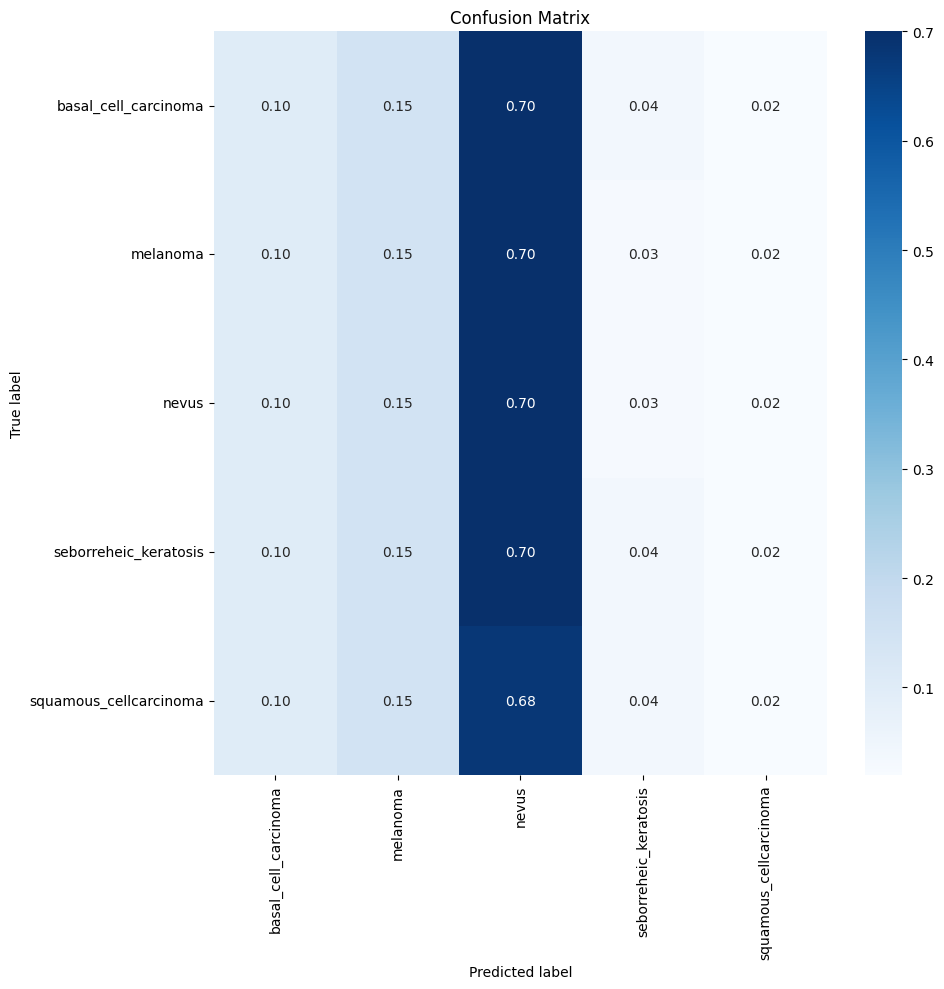

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtenha previsões do conjunto de teste
y_pred = np.argmax(AlexNet.predict(test_ds), axis=1)

# Obtenha os rótulos verdadeiros do conjunto de teste
y_true = []
for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))

# Converta listas para arrays numpy
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calcule a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Normalize a matriz de confusão
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm = np.around(cm_norm, decimals=2)

# Crie um DataFrame para a matriz de confusão
cm_df = pd.DataFrame(cm_norm, index=class_names, columns=class_names)

# Visualize a matriz de confusão
plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues, fmt='.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [13]:

from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions for the test set
y_pred = np.argmax(AlexNet.predict(test_ds), axis=1)

# Get true labels for the test set
y_true = []
for images, labels in test_ds:
  y_true.extend(np.argmax(labels.numpy(), axis=1))

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

479/479 ━━━━━━━━━━━━━━━━━━━━ 124s 258ms/step
Confusion Matrix:
[[  464   724  3316   171    92]
 [  730  1051  5026   256   163]
 [ 3307  4810 22746  1123   628]
 [  193   277  1332    74    29]
 [  126   205   916    41    13]]
